# Abstract

According to the dataset considered, this situation deals with violation of laws 
and the features related to citations in court from different areas for different people. Most of the times 
when there is violation of law, the authorities settle it using charges. Few times there are 
cases where people are charged without committing any violations or there are cases where people resist the charges
for a inevitable reason. so in this work, for a citation, we are going to find if the hearing Status is issued or not 
meaning we are trying to understand how features of citations are affecting people who face any hearing status 
and people who don't have one. This helps us to know better about the current mindset of people and the mistakes 
made by them and in-turn provide a analysis for jurisdiction for easy flow of their work. 

# Importing Libraries

In [1]:
# handling the tabular data
import numpy as np
import pandas as pd

# visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt

# Data pre-processing 
from sklearn.preprocessing import LabelEncoder

# Data Cross Validation or Model Selection
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV

# Algorithms 
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,RocCurveDisplay,roc_curve,auc

# Data Acquisition

In [ ]:
data = pd.read_csv("/content/Environmental_Citations (3).csv")
data

,CitationNo,LienCode,ViolationDate,DueDate,Agency,FineAmount,Description,Balance,LastPaidDate,LastPaidAmount,...,HearingStatus,HearTime,TotalPaid,TotalAbated,TotalVoided,Neighborhood,PoliceDistrict,CouncilDistrict,Location,ESRI_OID
0,2313252,L,2009/01/26 05:00:00+00,2009/02/25 05:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Coppin Heights/Ash-Co-East,Western,7.0,"(39.30793364,-76.65344787)",1504
1,2708147,L,2009/09/09 04:00:00+00,2009/10/09 04:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Beechfield,Southwestern,8.0,"(39.27839051,-76.69754927)",1502
2,2708154,L,2009/09/09 04:00:00+00,2009/10/09 04:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Beechfield,Southwestern,8.0,"(39.27860883,-76.69752023)",1503
3,2708162,L,2009/09/09 04:00:00+00,2009/10/09 04:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Beechfield,Southwestern,8.0,"(39.27888220,-76.69748387)",1505
4,2810646,L,2005/07/06 04:00:00+00,2005/08/05 04:00:00+00,BALTIMORE CITY POLICE DEPARTMENT ...,60,HIGH GRASS AND WEEDS ...,180.0,NaN,0.0,...,,,0.0,0.0,0.0,Central Park Heights,Northwestern,6.0,"(39.34586982,-76.67082210)",1506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204156,56305766,L,2021/11/15 05:00:00+00,2021/12/19 05:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,HIGH GRASS AND WEEDS ...,50.0,NaN,0.0,...,,,0.0,0.0,0.0,Waltherson,Notheastern,3.0,"(39.33188445,-76.56150105)",204157
204157,56305774,L,2021/11/15 05:00:00+00,2021/12/19 05:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,TRASH ACCUMULATION ...,50.0,NaN,0.0,...,,,0.0,0.0,0.0,Waltherson,Notheastern,3.0,"(39.33188445,-76.56150105)",204158
204158,56305782,L,2021/11/16 05:00:00+00,2021/12/19 05:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,BULK TRASH ...,50.0,NaN,0.0,...,,,0.0,0.0,0.0,Wilson Park,Northern,4.0,"(39.34381215,-76.60775564)",204159
204159,56305790,L,2021/11/15 05:00:00+00,2021/12/19 05:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,HIGH GRASS AND WEEDS ...,50.0,NaN,0.0,...,,,0.0,0.0,0.0,Allendale,Southwestern,8.0,"(39.28925715,-76.67446737)",204160


### As data is very large, we are considering only a sample which we can handle 

In [ ]:
data = data.iloc[:50000,:]
data

,CitationNo,LienCode,ViolationDate,DueDate,Agency,FineAmount,Description,Balance,LastPaidDate,LastPaidAmount,...,HearingStatus,HearTime,TotalPaid,TotalAbated,TotalVoided,Neighborhood,PoliceDistrict,CouncilDistrict,Location,ESRI_OID
0,2313252,L,2009/01/26 05:00:00+00,2009/02/25 05:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Coppin Heights/Ash-Co-East,Western,7.0,"(39.30793364,-76.65344787)",1504
1,2708147,L,2009/09/09 04:00:00+00,2009/10/09 04:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Beechfield,Southwestern,8.0,"(39.27839051,-76.69754927)",1502
2,2708154,L,2009/09/09 04:00:00+00,2009/10/09 04:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Beechfield,Southwestern,8.0,"(39.27860883,-76.69752023)",1503
3,2708162,L,2009/09/09 04:00:00+00,2009/10/09 04:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Beechfield,Southwestern,8.0,"(39.27888220,-76.69748387)",1505
4,2810646,L,2005/07/06 04:00:00+00,2005/08/05 04:00:00+00,BALTIMORE CITY POLICE DEPARTMENT ...,60,HIGH GRASS AND WEEDS ...,180.0,NaN,0.0,...,,,0.0,0.0,0.0,Central Park Heights,Northwestern,6.0,"(39.34586982,-76.67082210)",1506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,53716924,L,2015/02/06 05:00:00+00,2015/03/08 05:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,BULK TRASH ...,150.0,2018/05/14 04:00:00+00,150.0,...,,,0.0,0.0,0.0,Patterson Place,Southeastern,1.0,"(39.29400268,-76.58455137)",49996
49996,53717021,L,2015/02/02 05:00:00+00,2015/03/04 05:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,CONSTRUCTION AND MAINTENANCE OF STORAGE RECEPT...,0.0,2019/05/30 04:00:00+00,150.0,...,,,150.0,0.0,0.0,Coppin Heights/Ash-Co-East,Western,7.0,"(39.30721610,-76.65520872)",49997
49997,53717039,L,2015/02/02 05:00:00+00,2015/03/04 05:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,BULK TRASH ...,0.0,2019/05/30 04:00:00+00,150.0,...,,,150.0,0.0,0.0,Coppin Heights/Ash-Co-East,Western,7.0,"(39.30721610,-76.65520872)",49998
49998,53717047,L,2015/02/02 05:00:00+00,2015/03/04 05:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,EXTERIOR PEST CONTROL ...,0.0,2019/05/30 04:00:00+00,150.0,...,,,150.0,0.0,0.0,Coppin Heights/Ash-Co-East,Western,7.0,"(39.30721610,-76.65520872)",49999


# Data Analysis and Pre-Processing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CitationNo                  50000 non-null  int64  
 1   LienCode                    50000 non-null  object 
 2   ViolationDate               50000 non-null  object 
 3   DueDate                     50000 non-null  object 
 4   Agency                      50000 non-null  object 
 5   FineAmount                  50000 non-null  int64  
 6   Description                 50000 non-null  object 
 7   Balance                     50000 non-null  float64
 8   LastPaidDate                7190 non-null   object 
 9   LastPaidAmount              50000 non-null  float64
 10  HearingDate                 4422 non-null   object 
 11  HearingRequestReceivedDate  3428 non-null   object 
 12  CitationStatus              50000 non-null  object 
 13  ViolationCodeArticle        500

In [ ]:
data.ViolationCodeSection.value_counts()

305.2.2       5409
4-5A.2        4003
306.2         3136
306.1         2984
306.3B        2905
              ... 
38-19            1
307.2.2          1
7-205            1
12-112(B)        1
6-505            1
Name: ViolationCodeSection, Length: 189, dtype: int64

In [ ]:
data.Block.value_counts()

         6994
7492C     222
5210E     153
3301      133
0271      111
         ... 
4032        1
0906        1
2932        1
8139E       1
3864        1
Name: Block, Length: 3412, dtype: int64

In [ ]:
data.Lot.value_counts()

        6996
001     1251
011      854
006      815
015      812
        ... 
711        1
205        1
844        1
432        1
098J       1
Name: Lot, Length: 820, dtype: int64

In [ ]:
data.Neighborhood.value_counts()

Broadway East                      8432
Carrollton Ridge                   1639
Central Park Heights               1427
Belair-Edison                      1326
Coldstream Homestead Montebello    1219
                                   ... 
Bellona-Gittings                      1
Villages Of Homeland                  1
Orangeville Industrial Area           1
Lower Herring Run Park                1
Wakefield                             1
Name: Neighborhood, Length: 249, dtype: int64

### removing the columns which are insignificant
### 1. columns with large number of unique values
### 2. we are not performing time series analysis. so, removing the columns with time related data

In [ ]:
data.drop(columns=["CitationNo","ViolationDate","DueDate",
                   "ESRI_OID","Location","OfficerID","Description",
                   "LastPaidDate","HearingDate","HearingRequestReceivedDate",
                   "ViolationLocation","ViolationCodeSection","Block","Lot",
                   "HearTime","Neighborhood","Location"],inplace=True)
data

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,LienCode,Agency,FineAmount,Balance,LastPaidAmount,CitationStatus,ViolationCodeArticle,OfficerPresenceRequested,HearingStatus,TotalPaid,TotalAbated,TotalVoided,PoliceDistrict,CouncilDistrict
0,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Western,7.0
1,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Southwestern,8.0
2,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Southwestern,8.0
3,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Southwestern,8.0
4,L,BALTIMORE CITY POLICE DEPARTMENT ...,60,180.0,0.0,O,03,,,0.0,0.0,0.0,Northwestern,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,L,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,150.0,150.0,O,PM,,,0.0,0.0,0.0,Southeastern,1.0
49996,L,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,0.0,150.0,P,PM,,,150.0,0.0,0.0,Western,7.0
49997,L,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,0.0,150.0,P,PM,,,150.0,0.0,0.0,Western,7.0
49998,L,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,0.0,150.0,P,PM,,,150.0,0.0,0.0,Western,7.0


# Data EDA

## understanding all the different categorical column's data distributions for further processing 

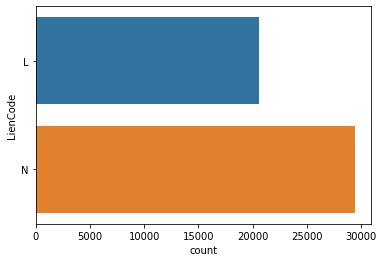

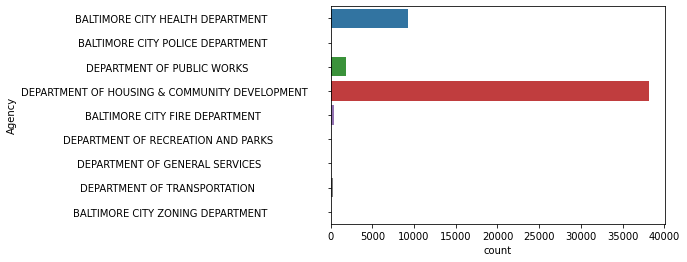

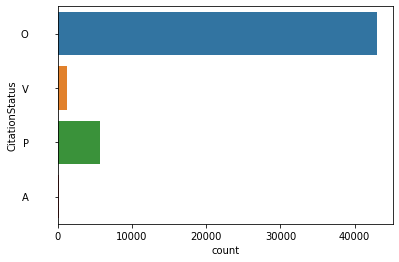

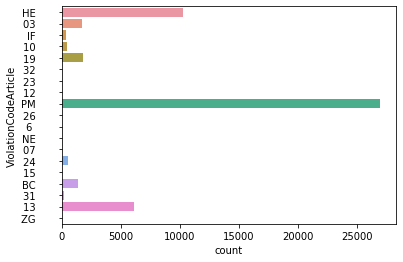

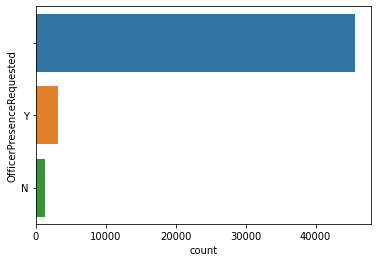

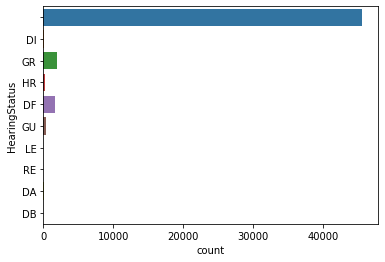

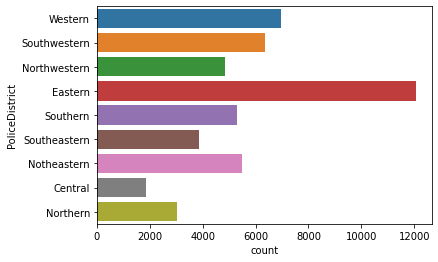

In [ ]:
for i in data.columns:
    if str(data[i].dtype) == "object":
        sns.countplot(data=data,y=data[i])
        plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LienCode                  50000 non-null  object 
 1   Agency                    50000 non-null  object 
 2   FineAmount                50000 non-null  int64  
 3   Balance                   50000 non-null  float64
 4   LastPaidAmount            50000 non-null  float64
 5   CitationStatus            50000 non-null  object 
 6   ViolationCodeArticle      50000 non-null  object 
 7   OfficerPresenceRequested  50000 non-null  object 
 8   HearingStatus             50000 non-null  object 
 9   TotalPaid                 50000 non-null  float64
 10  TotalAbated               50000 non-null  float64
 11  TotalVoided               50000 non-null  float64
 12  PoliceDistrict            49778 non-null  object 
 13  CouncilDistrict           49779 non-null  float64
dtypes: flo

In [ ]:
data.describe()

,FineAmount,Balance,LastPaidAmount,TotalPaid,TotalAbated,TotalVoided,CouncilDistrict
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49779.000000
mean,180.086860,406.790517,36.896841,36.242212,36.902498,16.111576,9.040298
std,221.614981,518.610810,155.028564,156.421706,192.641460,145.660064,3.437810
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,50.000000,150.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,60.000000,150.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,250.000000,500.000000,0.000000,0.000000,0.000000,0.000000,12.000000
max,8000.000000,6000.000000,2500.000000,3001.720000,4000.000000,8000.000000,14.000000


# Feature Engineering

## 1. Handling the Missing values

In [ ]:
data.isna().sum()

LienCode                      0
Agency                        0
FineAmount                    0
Balance                       0
LastPaidAmount                0
CitationStatus                0
ViolationCodeArticle          0
OfficerPresenceRequested      0
HearingStatus                 0
TotalPaid                     0
TotalAbated                   0
TotalVoided                   0
PoliceDistrict              222
CouncilDistrict             221
dtype: int64

In [ ]:
print(f"approximate percentage of missing values: {222/50000} %")

approximate percentage of missing values: 0.00444 %


### removing all the rows where there are missing values, as the percentage of missing values is vey less

In [ ]:
data.dropna(inplace=True)
data.isna().sum()

LienCode                    0
Agency                      0
FineAmount                  0
Balance                     0
LastPaidAmount              0
CitationStatus              0
ViolationCodeArticle        0
OfficerPresenceRequested    0
HearingStatus               0
TotalPaid                   0
TotalAbated                 0
TotalVoided                 0
PoliceDistrict              0
CouncilDistrict             0
dtype: int64

## 2. Handling the Outliers

### Finding the Outliers using different methods and removing them

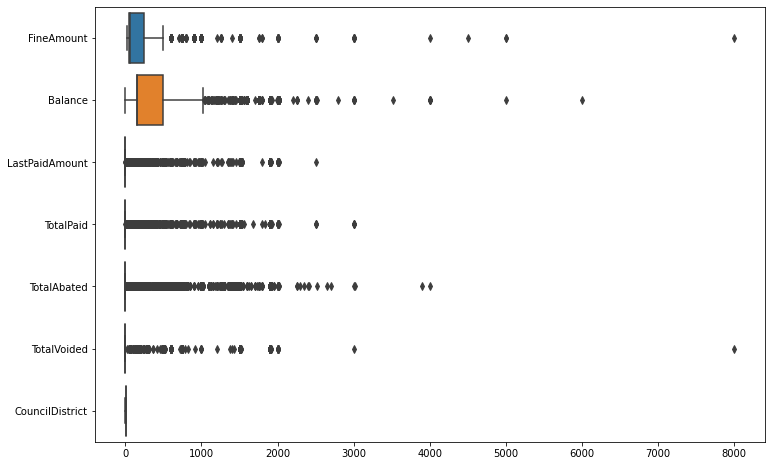

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data,orient="h")
plt.show()

### Using the Isolation Forest algorithm to finalize on the outlires

In [ ]:
IF = IsolationForest(random_state=5)
outliers = IF.fit_predict(data[["FineAmount","Balance","LastPaidAmount","TotalAbated","TotalPaid","TotalVoided","CouncilDistrict"]].values)
data = data[outliers!=-1]
data

,LienCode,Agency,FineAmount,Balance,LastPaidAmount,CitationStatus,ViolationCodeArticle,OfficerPresenceRequested,HearingStatus,TotalPaid,TotalAbated,TotalVoided,PoliceDistrict,CouncilDistrict
0,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Western,7.0
1,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Southwestern,8.0
2,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Southwestern,8.0
3,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Southwestern,8.0
4,L,BALTIMORE CITY POLICE DEPARTMENT ...,60,180.0,0.0,O,03,,,0.0,0.0,0.0,Northwestern,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,N,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,150.0,0.0,O,19,,,0.0,0.0,0.0,Southeastern,13.0
49995,L,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,150.0,150.0,O,PM,,,0.0,0.0,0.0,Southeastern,1.0
49996,L,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,0.0,150.0,P,PM,,,150.0,0.0,0.0,Western,7.0
49997,L,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,0.0,150.0,P,PM,,,150.0,0.0,0.0,Western,7.0


### After outlier removal using the Isolation Forest

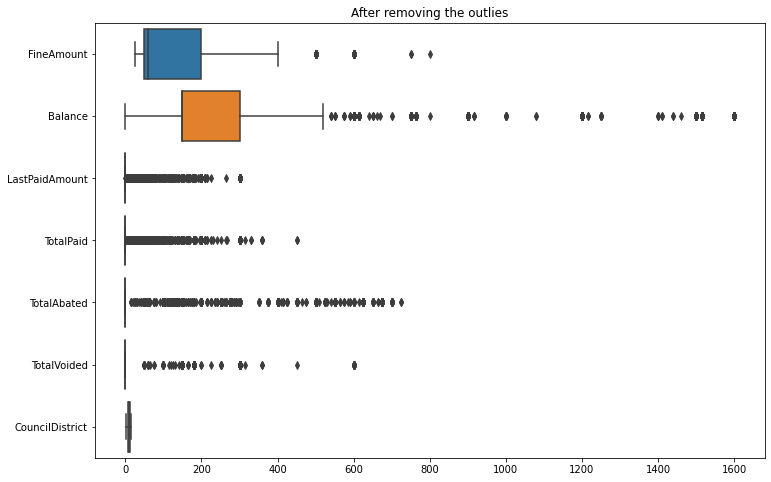

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data,orient="h")
plt.title("After removing the outlies")
plt.show()

## 3. Handling the object/categorical type of columns

In [ ]:
df = data.copy(deep=True)

df.LienCode.replace({'L':1, 'N':0},inplace=True)
df.OfficerPresenceRequested.replace({' ':"not_considered"},inplace=True)

le_VCA = LabelEncoder()
le_PD = LabelEncoder()
df.ViolationCodeArticle = le_VCA.fit_transform(data.ViolationCodeArticle)
df.PoliceDistrict = le_PD.fit_transform(data.PoliceDistrict)

agency_one_hot = pd.get_dummies(data.Agency,prefix="Agen")
CS_one_hot = pd.get_dummies(data.CitationStatus,prefix="CS")
OPR_one_hot = pd.get_dummies(df.OfficerPresenceRequested,prefix="OPR")
df = pd.concat([df,agency_one_hot,CS_one_hot,OPR_one_hot],axis=1)
df.drop(columns=["Agency","CitationStatus","OfficerPresenceRequested"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44834 entries, 0 to 49998
Data columns (total 27 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   LienCode                                                 44834 non-null  int64  
 1   FineAmount                                               44834 non-null  int64  
 2   Balance                                                  44834 non-null  float64
 3   LastPaidAmount                                           44834 non-null  float64
 4   ViolationCodeArticle                                     44834 non-null  int64  
 5   HearingStatus                                            44834 non-null  object 
 6   TotalPaid                                                44834 non-null  float64
 7   TotalAbated                                              44834 non-null  float64
 8   TotalVoided               

In [ ]:
df.HearingStatus.unique()

array(['  ', 'GR', 'HR', 'DF', 'GU', 'RE', 'DA', 'DI', 'LE', 'DB'],
      dtype=object)

In [ ]:
df.HearingStatus = df.HearingStatus.apply(lambda x: 1 if x!='  ' else 0)
df.HearingStatus.value_counts()

0    41917
1     2917
Name: HearingStatus, dtype: int64

<AxesSubplot:xlabel='HearingStatus', ylabel='count'>

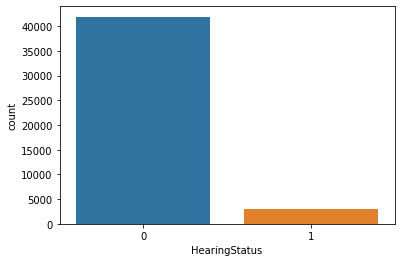

In [ ]:
sns.countplot(data=df,x=df.HearingStatus)
plt.show()

#### we have 
* 93.49377704420752% negative values
* 6.506222955792479% positive values

### EDA on the processed_data

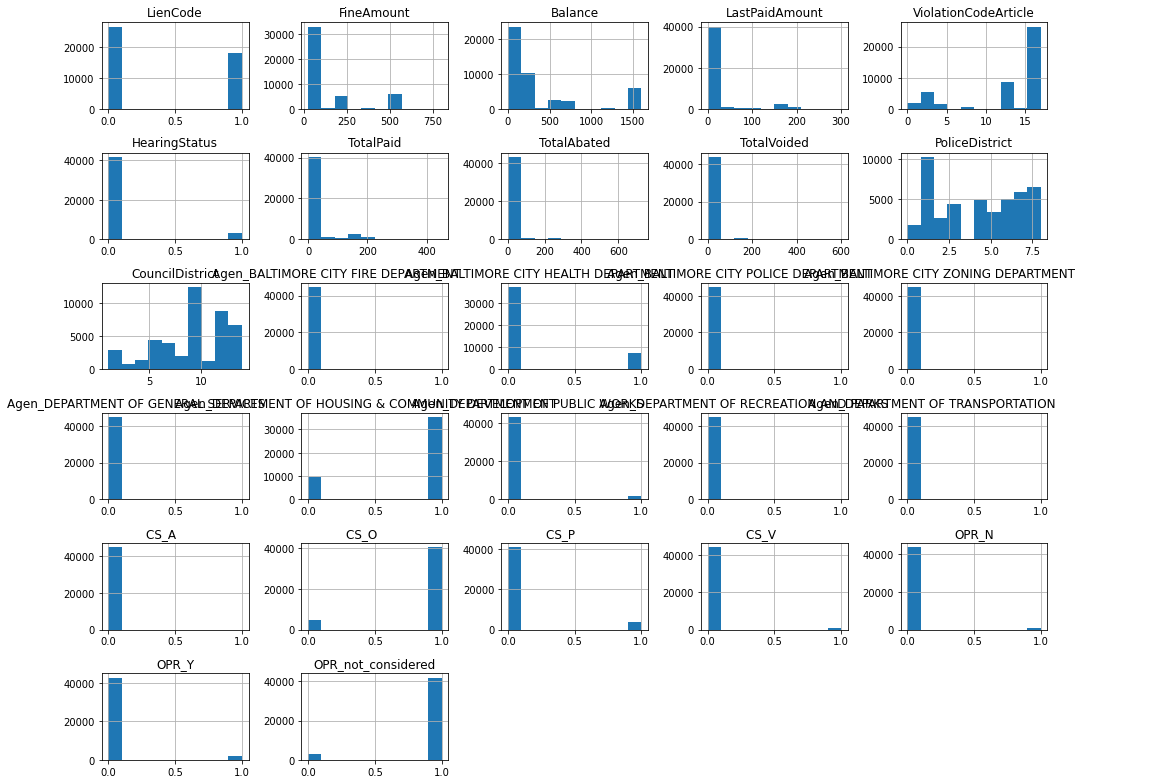

In [ ]:
df.hist(figsize=(14,11))
plt.tight_layout()
plt.show()

#### Correlation matrix

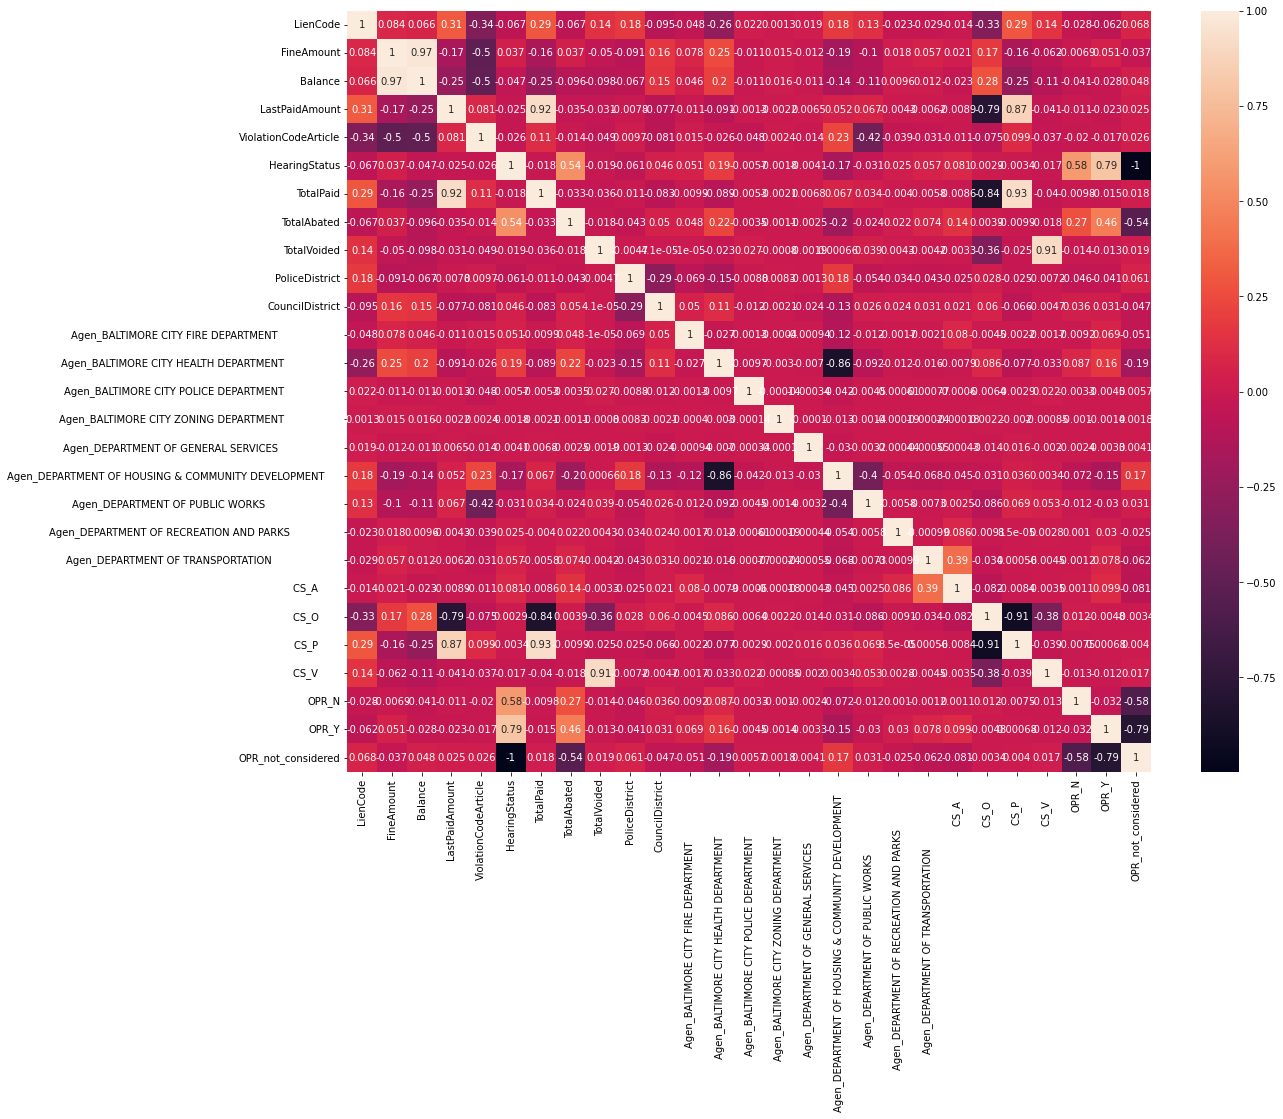

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

## 4. Using High Correlation filter

In [ ]:
removable_columns = set()
corr_mat = df.corr()
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i, j]) > 0.87:
            colname = corr_mat.columns[i]
            removable_columns.add(colname)
removable_columns

{'Balance', 'CS_P       ', 'CS_V       ', 'OPR_not_considered', 'TotalPaid'}

### removing the columns with high correlation values

In [ ]:
df.drop(columns=list(removable_columns),inplace=True)
df

,LienCode,FineAmount,LastPaidAmount,ViolationCodeArticle,HearingStatus,TotalAbated,TotalVoided,PoliceDistrict,CouncilDistrict,Agen_BALTIMORE CITY FIRE DEPARTMENT,...,Agen_BALTIMORE CITY ZONING DEPARTMENT,Agen_DEPARTMENT OF GENERAL SERVICES,Agen_DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT,Agen_DEPARTMENT OF PUBLIC WORKS,Agen_DEPARTMENT OF RECREATION AND PARKS,Agen_DEPARTMENT OF TRANSPORTATION,CS_A,CS_O,OPR_N,OPR_Y
0,1,100,0.0,13,0,0.0,0.0,8,7.0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,100,0.0,13,0,0.0,0.0,7,8.0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,100,0.0,13,0,0.0,0.0,7,8.0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,100,0.0,13,0,0.0,0.0,7,8.0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,60,0.0,0,0,0.0,0.0,3,6.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,0,50,0.0,5,0,0.0,0.0,5,13.0,0,...,0,0,1,0,0,0,0,1,0,0
49995,1,50,150.0,16,0,0.0,0.0,5,1.0,0,...,0,0,1,0,0,0,0,1,0,0
49996,1,50,150.0,16,0,0.0,0.0,8,7.0,0,...,0,0,1,0,0,0,0,0,0,0
49997,1,50,150.0,16,0,0.0,0.0,8,7.0,0,...,0,0,1,0,0,0,0,0,0,0


# Summary of Data Analysis and Data Pre-Processing
1.	The original dataset has 204161 rows and 30 columns
2.	We are considering only first 50000 rows and 30 columns as population for the research.
3.	As the population has many columns, missing values and outliers. We will  be processing the population with many different dimensionality reduction steps as follows
    * First removal of the columns with large number of categorical values as both one-hot encoding or label encoding will not reduce the dimension or will add bias to data.
    * Second handling the missing values, as in the population we have missing values in only 2 columns and they are only 0.0044%  of the total data. So we will remove the rows with missing values.
    * In few columns with continuous data, there were outliers which are being removed using Isolation Forest algorithm.
    * Now object type of data has to be vectorized. Here we are using label encoder to handle columns with moderately high categorical values and using one-hot encoder to handle columns with moderately low categorical values.
    * After having all the numerical data, now we will filter and remove all the columns with high correlation to reduce the dimensions of data.


## Setting the Features and Labels
* selecting the Hearing-Status as label.
* so as to predict in which instance people can got to that extent for violation charges.
* if a citation has Hearing or not is only considered.

In [ ]:
X = df.drop(columns=["HearingStatus"])
y = df.HearingStatus

# Data Partitioning

We are going with random samples for Training and Testing sets.

As in population, we have very less positive values
* 93.49377704420752% negative values
* 6.506222955792479% positive values

when random state '7' was used for splitting, it has more instances in minority class i.e. more positive values which helps in testing more on minority class

In training set, we are having
* 93.61251289486158% negative values
* 6.387487105138429% positive values

In testing set, we are having
* 93.0188468830155% negative values
* 6.9811531169844985% positive values

it is observed that both the training and testing set are following the ratios of the population.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [ ]:
X_train

,LienCode,FineAmount,LastPaidAmount,ViolationCodeArticle,TotalAbated,TotalVoided,PoliceDistrict,CouncilDistrict,Agen_BALTIMORE CITY FIRE DEPARTMENT,Agen_BALTIMORE CITY HEALTH DEPARTMENT,...,Agen_BALTIMORE CITY ZONING DEPARTMENT,Agen_DEPARTMENT OF GENERAL SERVICES,Agen_DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT,Agen_DEPARTMENT OF PUBLIC WORKS,Agen_DEPARTMENT OF RECREATION AND PARKS,Agen_DEPARTMENT OF TRANSPORTATION,CS_A,CS_O,OPR_N,OPR_Y
40139,0,100,0.0,13,0.0,0.0,8,9.0,0,1,...,0,0,0,0,0,0,0,1,0,0
557,1,50,0.0,0,0.0,0.0,3,6.0,0,0,...,0,0,0,1,0,0,0,1,0,0
38862,1,100,0.0,3,0.0,0.0,7,8.0,0,0,...,0,0,1,0,0,0,0,1,0,0
3602,0,500,0.0,14,0.0,0.0,1,12.0,1,0,...,0,0,0,0,0,0,0,1,0,0
34155,0,50,0.0,16,0.0,0.0,7,8.0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37457,0,60,0.0,16,0.0,0.0,4,3.0,0,0,...,0,0,1,0,0,0,0,1,0,0
15609,0,50,0.0,16,0.0,0.0,7,9.0,0,0,...,0,0,1,0,0,0,0,1,0,0
943,1,60,0.0,0,0.0,0.0,8,7.0,0,0,...,0,0,0,1,0,0,0,1,0,0
42473,0,500,0.0,13,0.0,0.0,1,12.0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
X_test

,LienCode,FineAmount,LastPaidAmount,ViolationCodeArticle,TotalAbated,TotalVoided,PoliceDistrict,CouncilDistrict,Agen_BALTIMORE CITY FIRE DEPARTMENT,Agen_BALTIMORE CITY HEALTH DEPARTMENT,...,Agen_BALTIMORE CITY ZONING DEPARTMENT,Agen_DEPARTMENT OF GENERAL SERVICES,Agen_DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT,Agen_DEPARTMENT OF PUBLIC WORKS,Agen_DEPARTMENT OF RECREATION AND PARKS,Agen_DEPARTMENT OF TRANSPORTATION,CS_A,CS_O,OPR_N,OPR_Y
45583,1,500,0.0,3,0.0,0.0,1,12.0,0,0,...,0,0,1,0,0,0,0,1,0,0
32214,0,200,0.0,5,0.0,0.0,1,12.0,0,0,...,0,0,1,0,0,0,0,1,0,0
47394,0,200,0.0,13,0.0,0.0,5,1.0,0,1,...,0,0,0,0,0,0,0,1,0,1
26315,0,50,0.0,16,0.0,0.0,3,6.0,0,0,...,0,0,1,0,0,0,0,1,0,0
33752,0,50,0.0,16,0.0,0.0,2,4.0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,0,200,0.0,13,0.0,0.0,1,12.0,0,1,...,0,0,0,0,0,0,0,1,0,0
3041,0,200,0.0,13,0.0,0.0,1,12.0,0,1,...,0,0,0,0,0,0,0,1,0,0
18802,0,60,0.0,16,0.0,0.0,8,9.0,0,0,...,0,0,1,0,0,0,0,1,0,0
38359,0,60,0.0,16,0.0,0.0,4,13.0,0,0,...,0,0,1,0,0,0,0,1,0,0


# **Minimum Performance level that classifiers should have to be useable:**
#  **93.0188468830155 %**

# Modeling

### Selecting Algorithms based on the immune or in-sensitive to outliers 
1. Decision Tree classifier
2. Random Forest Classifier
### And considering few more algorithm to understand the effect of outliers
1. Logistic Regression
2. Support Vector Machine

## Decision Tree Classifier

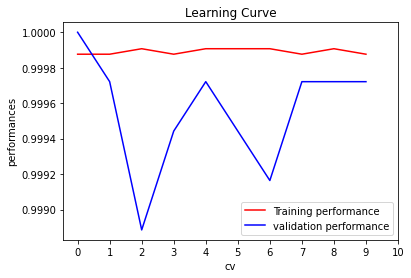

In [ ]:
# Instantiating Algorithm
dtc = DecisionTreeClassifier()

# Training and validation
out = learning_curve(dtc, X_train, y_train, train_sizes=[1.0], cv=10)
plt.plot(out[1][0],color="r",label="Training performance")
plt.plot(out[2][0],color="b",label="validation performance")
plt.title("Learning Curve")
plt.ylabel("performances")
plt.xlabel("cv")
plt.xticks(range(11))
plt.legend()
plt.show()

In [ ]:
# # Training the Algorithm
dtc.fit(X_train,y_train)

# Testing the Algorithm
dtc_pred = dtc.predict(X_test)

# evaluation
print(f"performance: {accuracy_score(y_test,dtc_pred)*100} %")
print(classification_report(y_test,dtc_pred))

performance: 99.9442399910784 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8341
           1       1.00      1.00      1.00       626

    accuracy                           1.00      8967
   macro avg       1.00      1.00      1.00      8967
weighted avg       1.00      1.00      1.00      8967



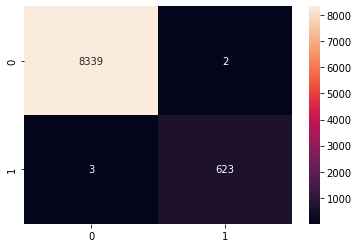

In [ ]:
sns.heatmap(confusion_matrix(y_test,dtc_pred),annot=True,fmt="d")
plt.show()

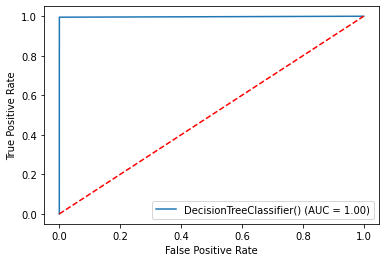

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,dtc_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=dtc)
display.plot()
plt.plot([0,1],[0,1],linestyle="--",color="r")
plt.show()

## Random Forest Classifier

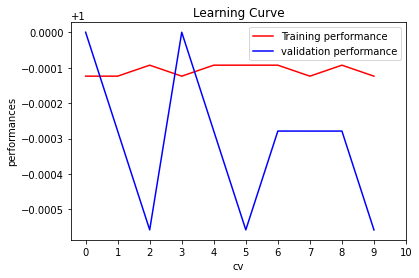

In [ ]:
# Instantiating Algorithm
rfc = RandomForestClassifier(random_state=0)

# Training and validation
out = learning_curve(rfc, X_train, y_train, train_sizes=[1.0], cv=10)
plt.plot(out[1][0],color="r",label="Training performance")
plt.plot(out[2][0],color="b",label="validation performance")
plt.title("Learning Curve")
plt.ylabel("performances")
plt.xlabel("cv")
plt.xticks(range(11))
plt.legend()
plt.show()

In [ ]:
# Training the Algorithm
rfc.fit(X_train,y_train)

# Testing the Algorithm
rfc_pred = rfc.predict(X_test)

# evaluation
print(f"performance: {accuracy_score(y_test,rfc_pred)*100} %")
print(classification_report(y_test,rfc_pred))

performance: 99.96654399464704 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8341
           1       1.00      1.00      1.00       626

    accuracy                           1.00      8967
   macro avg       1.00      1.00      1.00      8967
weighted avg       1.00      1.00      1.00      8967



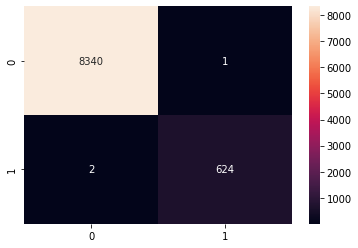

In [ ]:
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,fmt="d")
plt.show()

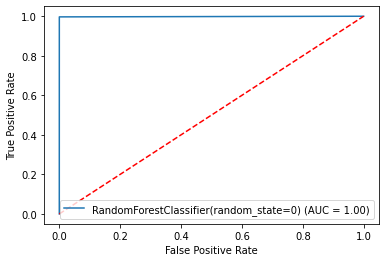

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,rfc_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=rfc)
display.plot()
plt.plot([0,1],[0,1],linestyle="--",color="r")
plt.show()

## Logistic Regression

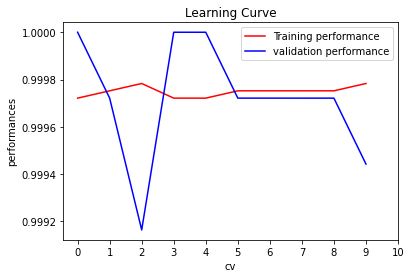

In [ ]:
# Instantiating Algorithm
log = LogisticRegression(penalty='l2', solver='liblinear')

# Training and validation
out = learning_curve(log, X_train, y_train, train_sizes=[1.0], cv=10)
plt.plot(out[1][0],color="r",label="Training performance")
plt.plot(out[2][0],color="b",label="validation performance")
plt.title("Learning Curve")
plt.ylabel("performances")
plt.xlabel("cv")
plt.xticks(range(11))
plt.legend()
plt.show()

In [ ]:
# Training the Algorithm
log.fit(X_train,y_train)

# Testing the Algorithm
log_pred = log.predict(X_test)

# evaluation
print(f"perfomance: {accuracy_score(y_test,log_pred)*100} %")
print(classification_report(y_test,log_pred))

perfomance: 99.95539199286272 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8341
           1       1.00      1.00      1.00       626

    accuracy                           1.00      8967
   macro avg       1.00      1.00      1.00      8967
weighted avg       1.00      1.00      1.00      8967



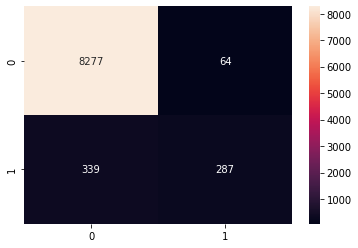

In [ ]:
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt="d")
plt.show()

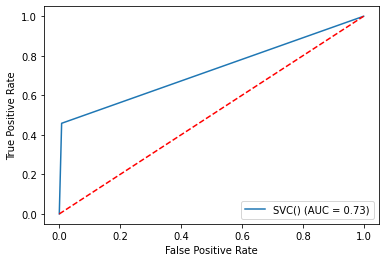

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,svm_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=svm)
display.plot()
plt.plot([0,1],[0,1],linestyle="--",color="r")
plt.show()

## Support Vector Machine

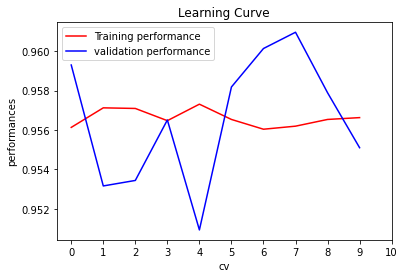

In [ ]:
# Instantiating Algorithm
svm = SVC()

# Training and validation
out = learning_curve(svm, X_train, y_train, train_sizes=[1.0], cv=10)
plt.plot(out[1][0],color="r",label="Training performance")
plt.plot(out[2][0],color="b",label="validation performance")
plt.title("Learning Curve")
plt.ylabel("performances")
plt.xlabel("cv")
plt.xticks(range(11))
plt.legend()
plt.show()

In [ ]:
# Training the Algorithm
svm.fit(X_train,y_train)

# Testing the Algorithm
svm_pred = svm.predict(X_test)

# evaluation
print(f"perfomance: {accuracy_score(y_test,svm_pred)*100} %")
print(classification_report(y_test,svm_pred))

perfomance: 95.50574328091892 %
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8341
           1       0.82      0.46      0.59       626

    accuracy                           0.96      8967
   macro avg       0.89      0.73      0.78      8967
weighted avg       0.95      0.96      0.95      8967



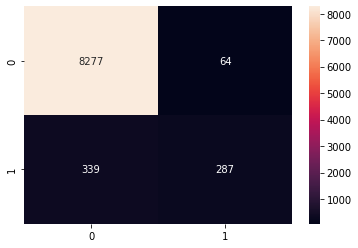

In [ ]:
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt="d")
plt.show()

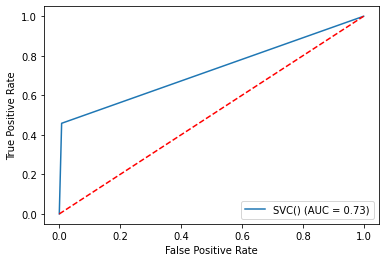

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,svm_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=svm)
display.plot()
plt.plot([0,1],[0,1],linestyle="--",color="r")
plt.show()

# Grid Sereach

## 1. Random Forest

In [ ]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = [
  {"random_state":[0,1,2,3,4,5,6,7,8,9],
   "n_estimators":[50,100],
   'max_depth': [10, 20, 30, None],
   'min_samples_leaf': [1, 2, 4],
   'min_samples_split': [2, 3]}
 ]

gcv_results = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy')
gcv_results = gcv_results.fit(X_train, y_train)
gcv_results

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': [10, 20, 30, None],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 3],
                          'n_estimators': [50, 100],
                          'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             scoring='accuracy')

In [ ]:
gcv_results.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 1}

In [ ]:
gcv_results.best_score_

0.9997490706308867

In [ ]:
gcv_results.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [ ]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

# Training the Algorithm
rfc.fit(X_train,y_train)

# Testing the Algorithm
rfc_pred = rfc.predict(X_test)

# evaluation
print(f"performance: {accuracy_score(y_test,rfc_pred)*100} %")
print(classification_report(y_test,rfc_pred))

performance: 99.96654399464704 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8341
           1       1.00      1.00      1.00       626

    accuracy                           1.00      8967
   macro avg       1.00      1.00      1.00      8967
weighted avg       1.00      1.00      1.00      8967



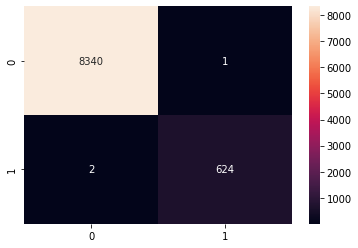

In [ ]:
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,fmt="d")
plt.show()

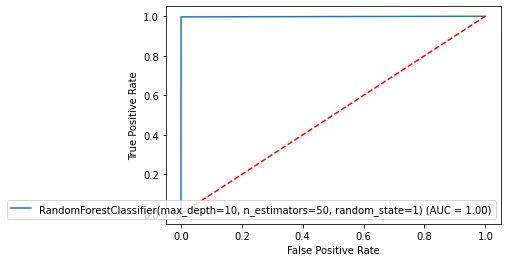

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,rfc_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=rfc)
display.plot()
plt.plot([0,1],[0,1],linestyle="--",color="r")
plt.show()

## 2. Logistic Regression

In [ ]:
log.get_params()

{'C': 100,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = [
  {"random_state":[0,1,2,3,4,5,6,7,8,9],
   'C': [1, 10, 100, 1000],
   'class_weight': [None, 'balanced']}
 ]

gcv_results = GridSearchCV(estimator=log, param_grid=param_grid, scoring='accuracy')
gcv_results = gcv_results.fit(X_train, y_train)
gcv_results

GridSearchCV(estimator=LogisticRegression(C=100, random_state=0,
                                          solver='liblinear'),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'class_weight': [None, 'balanced'],
                          'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             scoring='accuracy')

In [ ]:
gcv_results.best_params_

{'C': 100, 'class_weight': None, 'random_state': 0}

In [ ]:
gcv_results.best_score_

0.9997490706308867

In [ ]:
gcv_results.best_estimator_

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [ ]:
log = LogisticRegression(C=100, random_state=0, solver='liblinear',class_weight=None)

# Training the Algorithm
log.fit(X_train,y_train)

# Testing the Algorithm
log_pred = log.predict(X_test)

# evaluation
print(f"performance: {accuracy_score(y_test,log_pred)*100} %")
print(classification_report(y_test,log_pred))

performance: 99.95539199286272 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8341
           1       1.00      1.00      1.00       626

    accuracy                           1.00      8967
   macro avg       1.00      1.00      1.00      8967
weighted avg       1.00      1.00      1.00      8967



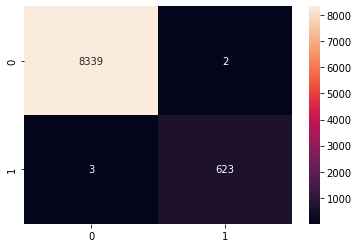

In [ ]:
sns.heatmap(confusion_matrix(y_test,log_pred),annot=True,fmt="d")
plt.show()

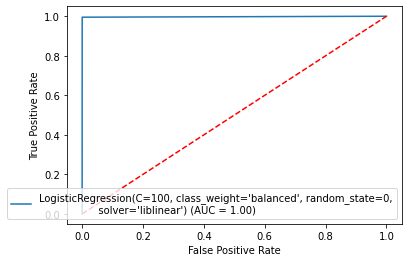

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,log_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=log)
display.plot()
plt.plot([0,1],[0,1],linestyle="--",color="r")
plt.show()

# selected metric system
* Accuracy Score
* Precision Score
* Recall
* f1-Score
* Confusion Matrix
* ROC curve

out of all the above metrics, 'accuracy' helped the most in many cases like Decision tree, Random Forest, Logistic Regression
where rest of the metrics like Recall, F1-score, precision were are 100% except for SVM Algorithm. Confusion matrix and ROC curve helped to understand the model better.

# Results
we were able to classify the instances as having a hearing or not having with a very good performance of 99.96+ % 
even when there were few outliers were left in the data. Random Forest was best and decision tree, Logistic Regression was also performing close to best and SVM had many difficulties in classification as it is sensitive to the outliers. 

# Next steps
1. we have only considered a sample data from the population. for the complete data the procedure for data pre-processing may change
2. all the outliers were not removed, few were left in the dataset. further understanding of the data in better way is possible.
3. much better algorithms can be researched on that can handle the outliers like voting classifier.
4. research can be done in finding a better representative sample. for training, validation and testing purposes by understanding the distributions of different random sample. And etc.

# References

#### 1. https://medium.com/swlh/top-five-methods-to-identify-outliers-in-data-2777a87dd7fe
#### 2. https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf